Universidad del Valle de Guatemala - 22/07/2022

Jose Abrahama Gutierrez Corado - 19111 <br>
Walter Danilo Saldaña - 19897 <br>
Javier Alejandro Cotto Argueta -19324


# Laboratorio 1
## Series de tiempo
______________________________________________________


Importar módulos

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Carga de datos

In [21]:
df = pd.read_csv('./GlobalLandTemperaturesByCountry.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


## 1. Análisis exploratorio

### Descripción del dataset
Representa las temperaturas promedio mensuales, desde 1750, para muchos lugares del mundo. El documento de donde se extrajo la información lo puede encontrar en el siguiente vínculo: http://berkeleyearth.org/data/

### Detalle de las variables

|Variable                      |Detalle|Clasificación|
|:-----------------------------|:------|:------------|
|dt                            |Date time. Mes y año de la medición|Cualitativa ordinal|
|AverageTemperature            |Temperatura promedio en el mes y año indicado por dt|Cuantitativa continua|
|AverageTemperatureUncertainty |Incertidumbre de la medición de temperatura|Cuantitativa continua|
|Country                       |País dónde se realizó la medición|Cualitativa nominal|


### Resúmen estadístico del dataset

In [22]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


### Limpieza de datos
#### Datos incompletos
Las series de datos que no tienen valor para la variable `AverageTemperature` no aportan información para el análisis, por lo cual se descartan.

In [23]:
df['AverageTemperature'].isnull().sum()

32651

In [24]:
df = df.dropna(subset=['AverageTemperature'])
df['AverageTemperature'].isnull().sum()

0

A fines prácticos se aproximará a 0 la incertidumbre (`AverageTemperatureUncertainty`) de las filas que no tengan información de la misma.

In [26]:
df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].fillna(0)
df['AverageTemperatureUncertainty'].isnull().sum()

0

#### Datos atípicos
Se analizan los datos atípicos de la variable `AverageTemperature`.

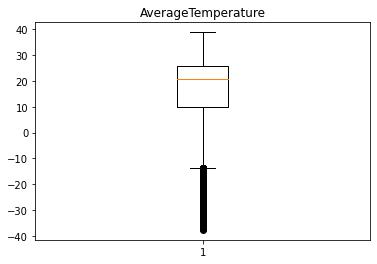

In [27]:
plt.boxplot(df['AverageTemperature'])
plt.title('AverageTemperature')
plt.show()

In [33]:
Q1 = df['AverageTemperature'].quantile(0.25)
Q3 = df['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

inferior = df[df['AverageTemperature'] < (Q1 - 1.5 * IQR)]
superior = df[df['AverageTemperature'] > (Q3 + 1.5 * IQR)]

In [37]:
len(inferior)

6438

In [38]:
len(superior)

0

Dada la naturaleza del dataset y al ser medidas climáticas, se espera que los datos atípicos sí aporten información significatica al análisis, por lo que no hay necesidad de eliminarlos.

Se analizan los datos atípicos de la variable `AverageTemperatureUncertainty`.

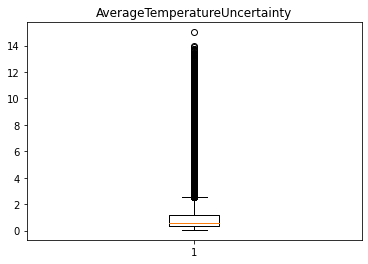

In [39]:
plt.boxplot(df['AverageTemperatureUncertainty'])
plt.title('AverageTemperatureUncertainty')
plt.show()

In [40]:
Q1 = df['AverageTemperatureUncertainty'].quantile(0.25)
Q3 = df['AverageTemperatureUncertainty'].quantile(0.75)
IQR = Q3 - Q1

inferior = df[df['AverageTemperatureUncertainty'] < (Q1 - 1.5 * IQR)]
superior = df[df['AverageTemperatureUncertainty'] > (Q3 + 1.5 * IQR)]

In [41]:
len(inferior)

0

In [42]:
len(superior)

48207

Para el caso de esta variable, si se hace notar la importancia de eliminar los datos atípicos, pues el extremo superior indica que hay varios datos con mediciones muy imprecisas, los cuales pueden distorsionar el análisis.

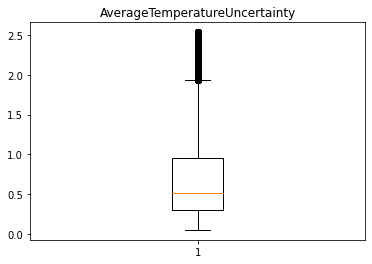

In [45]:
df.drop(superior.index, inplace=True)
    
plt.boxplot(df['AverageTemperatureUncertainty'])
plt.title('AverageTemperatureUncertainty')
plt.show()

### Comportamiento de datos

#### Normalidad de los datos

In [55]:
def show_normality(data):
    mu, std = norm.fit(data)
    plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    
    plt.show()
    
    kurtosis = data.kurtosis()
    skew = data.skew()
    print('Kurtosis: ', kurtosis)
    print('Sesgo: ', skew)

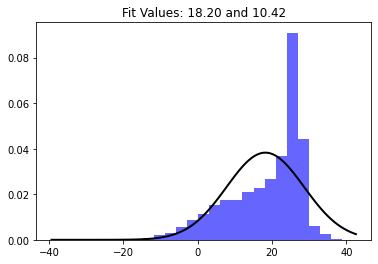

Kurtosis:  1.3855022552328835
Sesgo:  -1.2227423931132673


In [56]:
show_normality(df['AverageTemperature'])

No se puede aproximar la variable de `AverageTemperature` a una distribución normal.

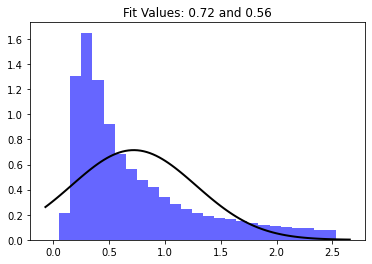

Kurtosis:  1.0329705116182009
Sesgo:  1.3416322002714294


In [57]:
show_normality(df['AverageTemperatureUncertainty'])

La variable de `AverageTemperatureUncertainty` tampoco cumple para una distribución normal.

#### Lugares con temperaturas más extremas

In [72]:
avg_temp_by_country = df.groupby('Country').mean()\
    .sort_values(by=['AverageTemperature'])

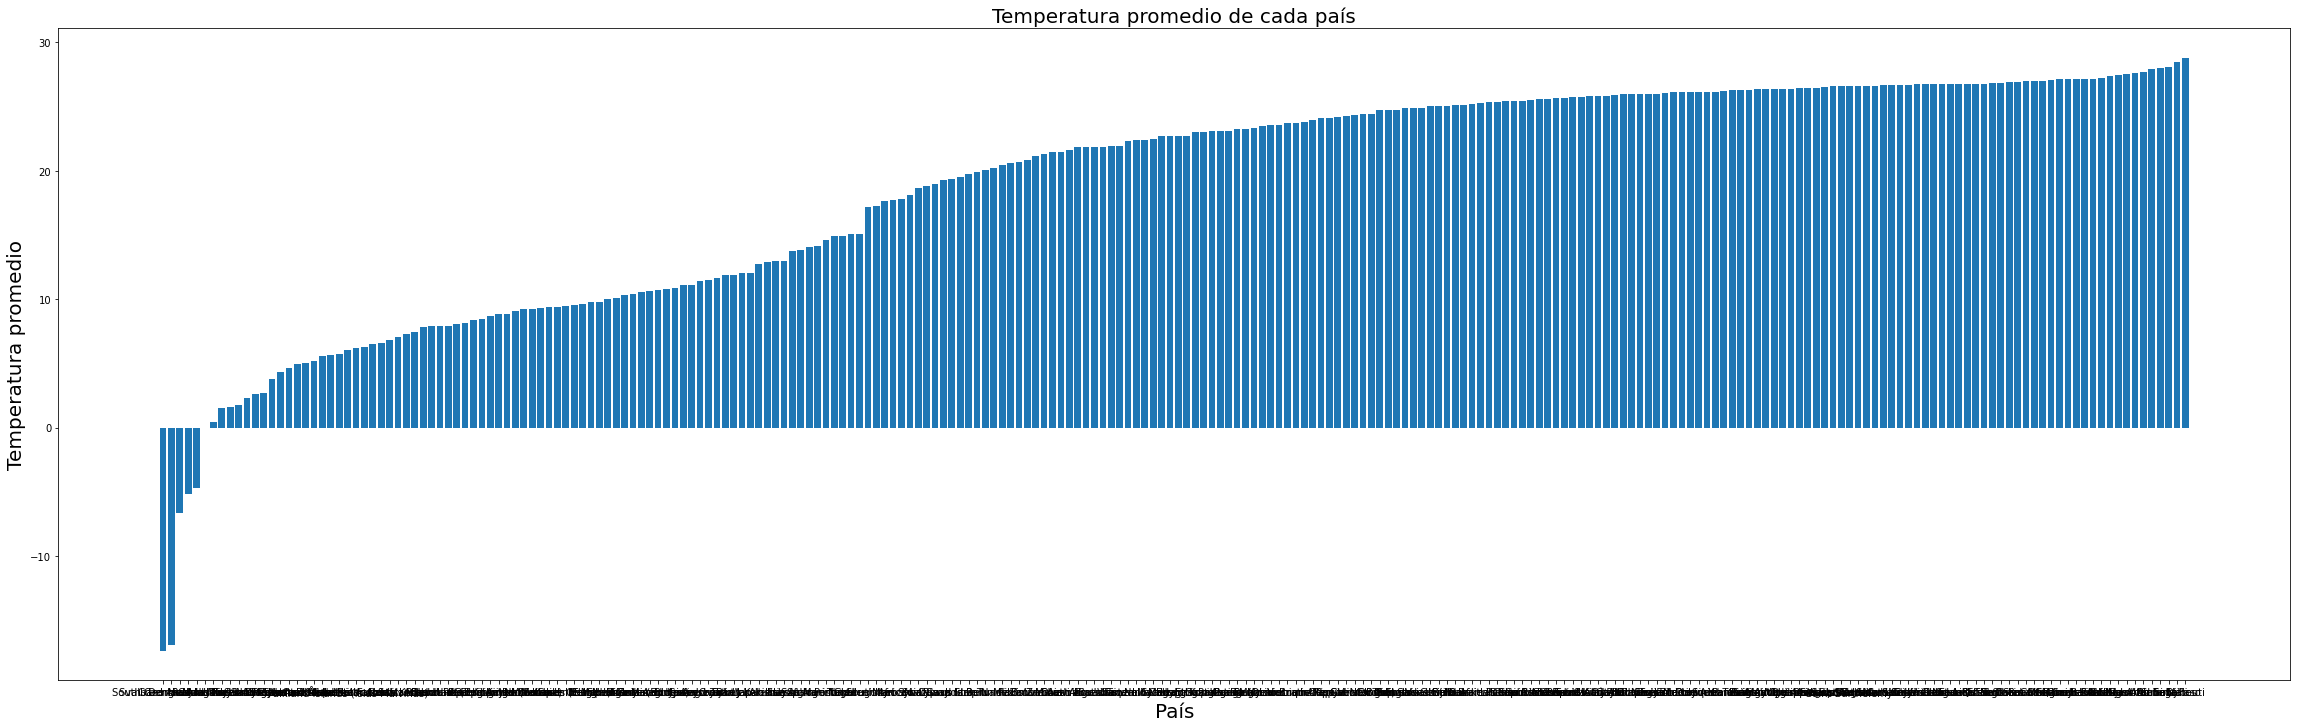

In [79]:
plt.figure(figsize=(40,12))
plt.bar(
    avg_temp_by_country.index,
    avg_temp_by_country['AverageTemperature']
)
plt.title('Temperatura promedio de cada país', size=20)
plt.xlabel('País', size=20)
plt.ylabel('Temperatura promedio', size=20)
plt.show()

Top 5 lugares con temperaturas más bajas:

In [75]:
avg_temp_by_country.head()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Greenland,-17.382228,1.251991
Denmark,-16.928744,1.227067
Svalbard And Jan Mayen,-6.653556,1.072731
Russia,-5.179728,0.890896
Canada,-4.682512,0.943881


Top 5 lugares con temperaturas más altas:

In [76]:
avg_temp_by_country.tail()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Aruba,27.924171,0.633795
Senegal,27.984304,0.672733
Burkina Faso,28.085516,0.694007
Mali,28.444861,0.772745
Djibouti,28.815201,0.860161


De lo más destacable en este punto es que los países más calurosos no difieren de forma extrema a la temperatura promedio del resto de países. Por el otro lado, los países más frios son más escasos, y con temperaturas más extremas en comparación a los demás.

## 2. Serie univariante por la variable AverageTemperature

### a. Especifique Inicio, fin, y frecuencia.

In [ ]:
#

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.

### d. Determine si es necesario transformar la serie. Explique.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 

### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie.

### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?